# COMPARING MY AMERICAN VS GERMAN TWITTER NETWORKS
### VISUALIZING THE DATA

# Step 0: 
### Importing libraries and the data:

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn: change palette and style 
sns.set_palette('Set3')
# sns.set_style("whitegrid")
sns.set_style('darkgrid')

# Try different seaborn palette: Set3, cool, winter_r

In [59]:
# Import the english language and german language tweets separately, as well as the combined (processed) df:
tweets_en = pd.read_csv('tweets_en.csv')
tweets_de = pd.read_csv('tweets_de.csv')
tweets_analysis = pd.read_csv('tweets_analysis.csv')

In [62]:
tweets_en.drop('Unnamed: 0', axis=1, inplace=True)
tweets_de.drop('Unnamed: 0', axis=1, inplace=True)
tweets_analysis.drop('Unnamed: 0', axis=1, inplace=True)

In [63]:
# Subset for just positive and negative tweets:
tweets_vis = tweets_analysis[tweets_analysis['Sentiment']!='neutral']

In [64]:
tweets_vis.head()

,TweetText,Handle,Location,Country,Gender,Language,text_processed,Polarity,Subjectivity,Sentiment
0,RT @rachel_groves: Daily goals: Wake up early....,joscchh,"Bonn, Deutschland",Germany,female,en,"['daili', 'goal', 'wake', 'earli', 'drink', 'c...",0.194048,0.427381,positive
1,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,"Bonn, Deutschland",Germany,female,en,"['good', 'topic', 'well', 'done']",0.700000,0.600000,positive
2,@jpbrice Life is always precious - every singl...,joscchh,"Bonn, Deutschland",Germany,female,en,"['jpbrice', 'life', 'alway', 'precious', 'ever...",0.272381,0.609524,positive
3,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,"Bonn, Deutschland",Germany,female,en,"['petershepherd', 'myork', 'zereadyoregon', 'g...",0.200000,0.385417,positive
4,RT @jpbrice: “You never know how strong you ar...,joscchh,"Bonn, Deutschland",Germany,female,en,"['never', 'know', 'strong', 'strong', 'onli', ...",0.288889,0.822222,positive


# Step 1:
### Visualize the polarity of German-language versus English-language Tweets (re: sentiment):

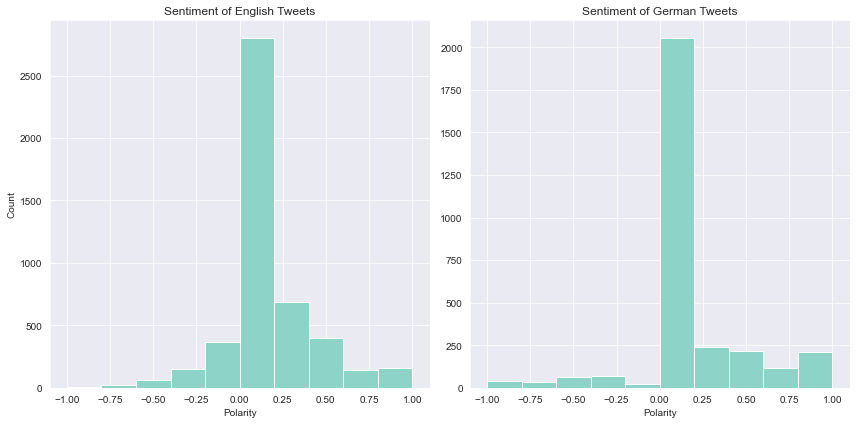

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.hist(tweets_en['Polarity'], edgecolor='white')
ax1.set_xlabel('Polarity')
ax1.set_ylabel('Count')
ax1.set_title('Sentiment of English Tweets')
ax2.hist(tweets_de['Polarity'], edgecolor='white')
ax2.set_xlabel('Polarity')
ax2.set_title('Sentiment of German Tweets')

plt.tight_layout()
# plt.savefig()
plt.show()

#### Remove middle polarity values and visualize just extremes to compare:

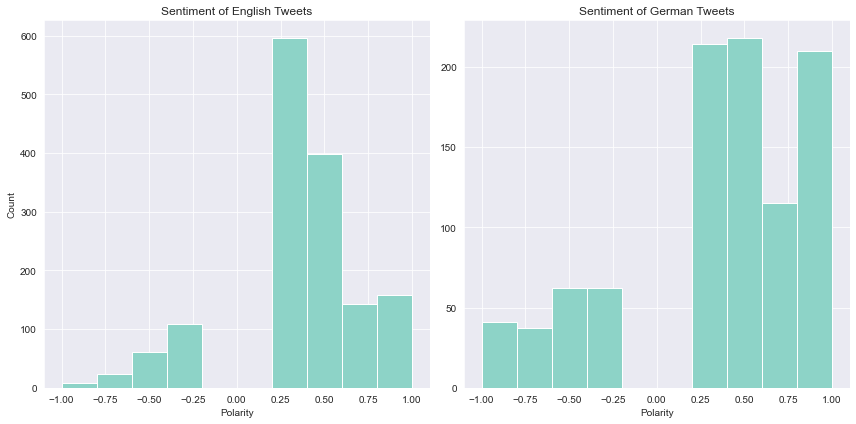

In [66]:
pol_extremes_en = tweets_en[(tweets_en['Polarity'] <= -0.25)|(tweets_en['Polarity'] >= 0.25)]
pol_extremes_de = tweets_de[(tweets_de['Polarity'] <= -0.25)|(tweets_de['Polarity'] >= 0.25)]


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.hist(pol_extremes_en['Polarity'], edgecolor='white')
ax1.set_xlabel('Polarity')
ax1.set_ylabel('Count')
ax1.set_title('Sentiment of English Tweets')
ax2.hist(pol_extremes_de['Polarity'], edgecolor='white')
ax2.set_xlabel('Polarity')
ax2.set_title('Sentiment of German Tweets')

plt.tight_layout()
plt.savefig('polarity_by_country.png')
plt.show()

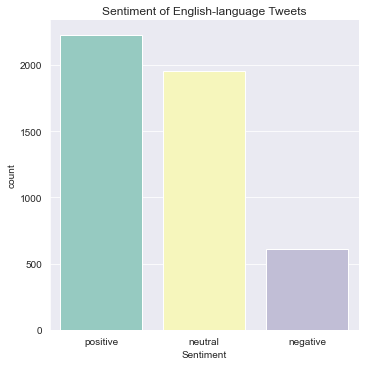

In [75]:
sns.catplot(x='Sentiment', kind='count', data=tweets_en, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment of English-language Tweets')
plt.savefig('sentiment_en_tweets.png')
plt.show()

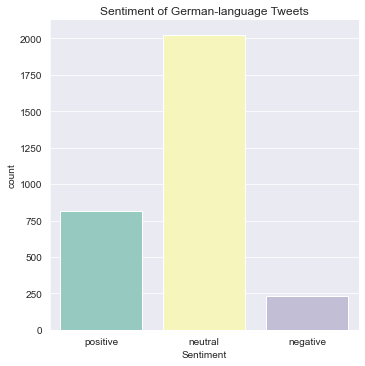

In [76]:
sns.catplot(x='Sentiment', kind='count', data=tweets_de, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment of German-language Tweets')
plt.savefig('sentiment_de_tweets.png')
plt.show()

# Step 2:
### Compare the general sentiment of tweets from German versus American network:

Remember: There are more tweets from German network than from the American network. Find the ratio of each sentiment from all tweets from that region, and compare the ratio rather than absolute tweets. 

Get the probability (predict_proba) of being positive (and compare probabilities from German or American network). 

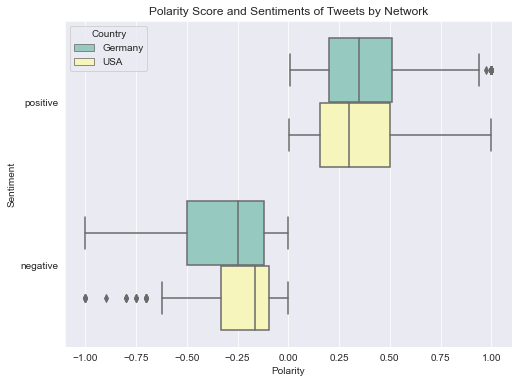

In [83]:
# Polarity score
# Without neutral tweets
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Polarity', y='Sentiment', data=tweets_vis, hue='Country')
plt.title('Polarity Score and Sentiments of Tweets by Network')
plt.savefig('polarity_by_country_boxchart.png')
plt.show()

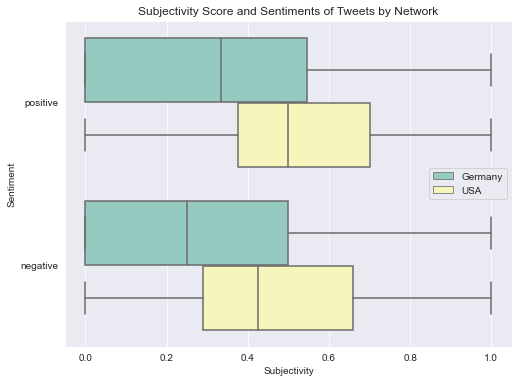

In [84]:
# Subjectivity score
# Without neutral tweets 

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Subjectivity', y='Sentiment', data=tweets_vis, hue='Country')
plt.title('Subjectivity Score and Sentiments of Tweets by Network')
plt.legend(loc='center right')
plt.savefig('subjectivity_by_country_boxchart.png')
plt.show()

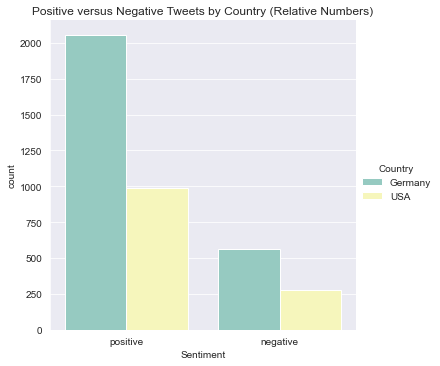

In [79]:
# Without neutral tweets

sns.catplot(x='Sentiment', kind='count', data=tweets_vis, hue='Country')
plt.title('Positive versus Negative Tweets by Country (Relative Numbers)')
plt.show()

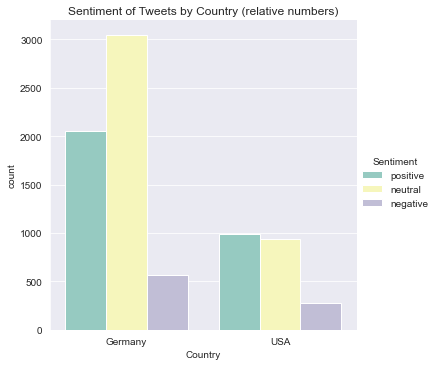

In [80]:
sns.catplot(x='Country', kind='count', hue='Sentiment', data=tweets_analysis)
plt.title('Sentiment of Tweets by Country (relative numbers)')
plt.savefig('sentiment_by_country.png')
plt.show()

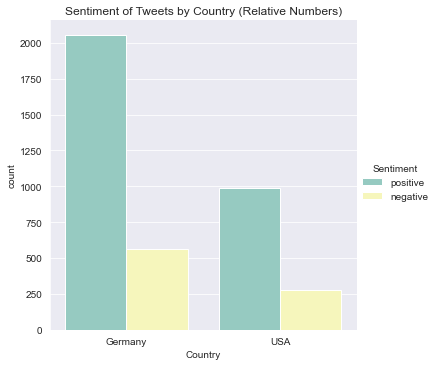

In [81]:
# Without neutral tweets

sns.catplot(x='Country', kind='count', hue='Sentiment', data=tweets_vis)
plt.title('Sentiment of Tweets by Country (Relative Numbers)')
plt.show()

# START HERE TO COMPARE RELATIVE INSTEAD OF ABSOLUTE 

#### But take into consideration that the absolute values will be off because there are so many more tweets from `['Country']='Germany'`

In [35]:
ger = tweets_analysis[tweets_analysis['Country']=='Germany']
print("Tweets from German Network: ", len(ger))

usa = tweets_analysis[tweets_analysis['Country']=='USA']
print("Tweets from American Network: ", len(usa))

Tweets from German Network:  5659
Tweets from American Network:  2200


In [36]:
ratio_us_pos = len(tweets_analysis[(tweets_analysis['Country']=='USA') & (tweets_analysis['Sentiment']=='positive')])/len(usa)
ratio_us_pos

0.4495454545454545

In [37]:
ratio_de_pos = len(tweets_analysis[(tweets_analysis['Country']=='Germany') & (tweets_analysis['Sentiment']=='positive')])/len(ger)
ratio_de_pos

0.36296165400247393

In [132]:
# How to visualize the ration instead of absolute # of tweets???


# Step 3:
### Adding the Gender Dimension to Analysis:

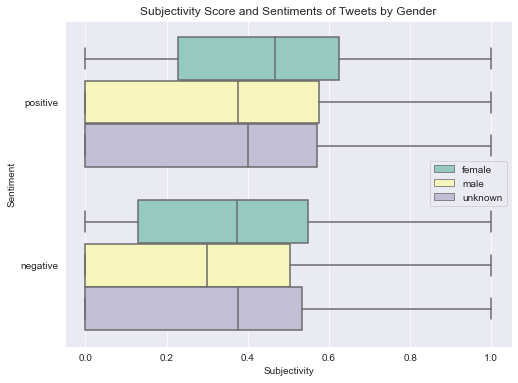

In [93]:
# Subjectivity of tweets by Gender (not country specific):

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Subjectivity', y='Sentiment', data=tweets_vis, hue='Gender')
plt.title('Subjectivity Score and Sentiments of Tweets by Gender')
plt.legend(loc='center right')
plt.savefig('subjectivity_by_gender_boxchart.png')
plt.show()

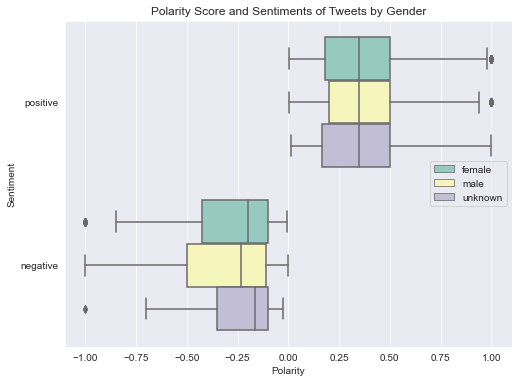

In [92]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Polarity', y='Sentiment', data=tweets_vis, hue='Gender')
plt.title('Polarity Score and Sentiments of Tweets by Gender')
plt.legend(loc='center right')
plt.savefig('polarity_by_gender_boxchart.png')
plt.show()

In [100]:
grouped_gender = tweets_analysis.groupby(['Gender', 'Country']).mean()
grouped_gender

Polarity  Subjectivity
Gender  Country                        
female  Germany  0.119840      0.203685
        USA      0.144715      0.332503
male    Germany  0.121454      0.176857
        USA      0.113924      0.321275
unknown Germany  0.124639      0.149793
        USA      0.098686      0.335065

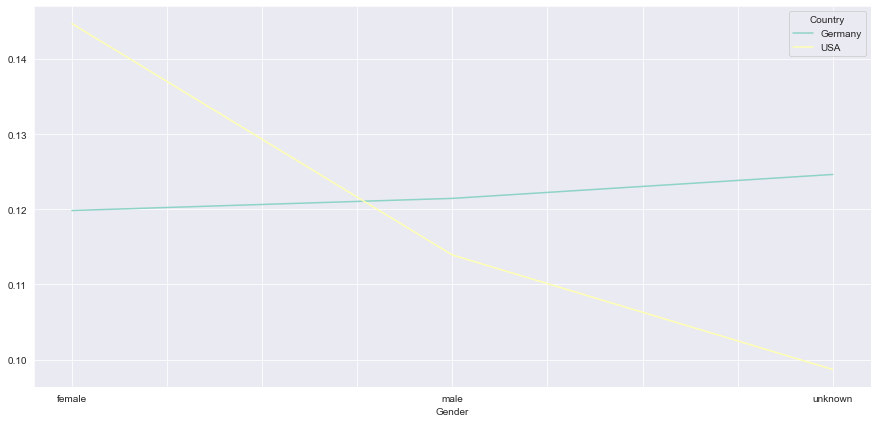

In [104]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
tweets_analysis.groupby(['Gender','Country']).mean()['Polarity'].unstack().plot(ax=ax)

# Poisson options for plotting, with just 'o' for example, instead of lines?